In [1]:
import pandas as pd
dataset = pd.read_csv("iris.csv")
dataset.drop_duplicates()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [2]:
from function import kmean
import numpy as np
cc = kmean(dataset[['petal.width', 'petal.length']])
cc.fit(3)
dataset['assign'] = cc.assig
vas = np.array(dataset['variety'])
va = dataset['variety'].unique()
for i in va:
    ass = [0, 0 , 0]
    for y in range(len(cc.assig)):
        if i == vas[y]:
            ass[cc.assig[y]] += 1
    print(i, ass)

Setosa [50, 0, 0]
Versicolor [1, 0, 49]
Virginica [0, 0, 50]


In [3]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

150


In [35]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf['assign'] = [i for i in range(len(finalDf))]
finalDf

,principal component 1,target,assign
0,-2.264542,Iris-setosa,0
1,-2.086426,Iris-setosa,1
2,-2.367950,Iris-setosa,2
3,-2.304197,Iris-setosa,3
4,-2.388777,Iris-setosa,4
...,...,...,...
145,1.870522,Iris-virginica,145
146,1.558492,Iris-virginica,146
147,1.520845,Iris-virginica,147
148,1.376391,Iris-virginica,148


In [36]:
from function import kmean
cc = kmean(finalDf[finalDf.columns.values[:-2]])
cc.fit(3)
finalDf['assign'] = cc.assig
vas = np.array(finalDf['target'])
va = finalDf['target'].unique()
for i in va:
    ass = [0, 0 , 0]
    for y in range(len(cc.assig)):
        if i == vas[y]:
            ass[cc.assig[y]] += 1
    print(i, ass)
print(pca.explained_variance_ratio_)

Iris-setosa [0, 50, 0]
Iris-versicolor [1, 0, 49]
Iris-virginica [38, 0, 12]
[0.72770452]


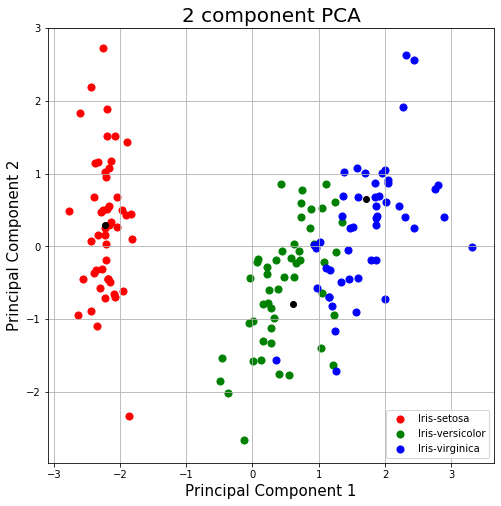

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
for t in cc.point:
    ax.scatter(t[0], t[1], c = 'black')
ax.legend(targets)
ax.grid()